In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("articulos_ml.csv")

In [4]:
df.shape

(161, 8)

In [5]:
df.head

<bound method NDFrame.head of                                                  Title  \
0    What is Machine Learning and how do we use it ...   
1     10 Companies Using Machine Learning in Cool Ways   
2    How Artificial Intelligence Is Revolutionizing...   
3    Dbrain and the Blockchain of Artificial Intell...   
4    Nasa finds entire solar system filled with eig...   
..                                                 ...   
156  [Log] 83: How Google Uses Machine Learning And...   
157  [Log] 84: Zuck Knows If You've Been Bad Or Goo...   
158  [Log] 85: Microsoft Improves Windows Phone Voi...   
159  [Log] 86: How Google's Acquisition Of DNNresea...   
160   [Log] 87: Google's Cloud Is Eating Apple's Lunch   

                                                   url  Word count  \
0    https://blog.signals.network/what-is-machine-l...        1888   
1                                                  NaN        1742   
2                                                  NaN         

In [7]:
df.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [32]:
df.dtypes

Title              object
url                object
Word count          int64
# of Links          int64
# of comments     float64
# Images video      int64
Elapsed days        int64
# Shares            int64
dtype: object

In [9]:
df.isnull().any()

Title             False
url                True
Word count        False
# of Links        False
# of comments      True
# Images video    False
Elapsed days      False
# Shares          False
dtype: bool

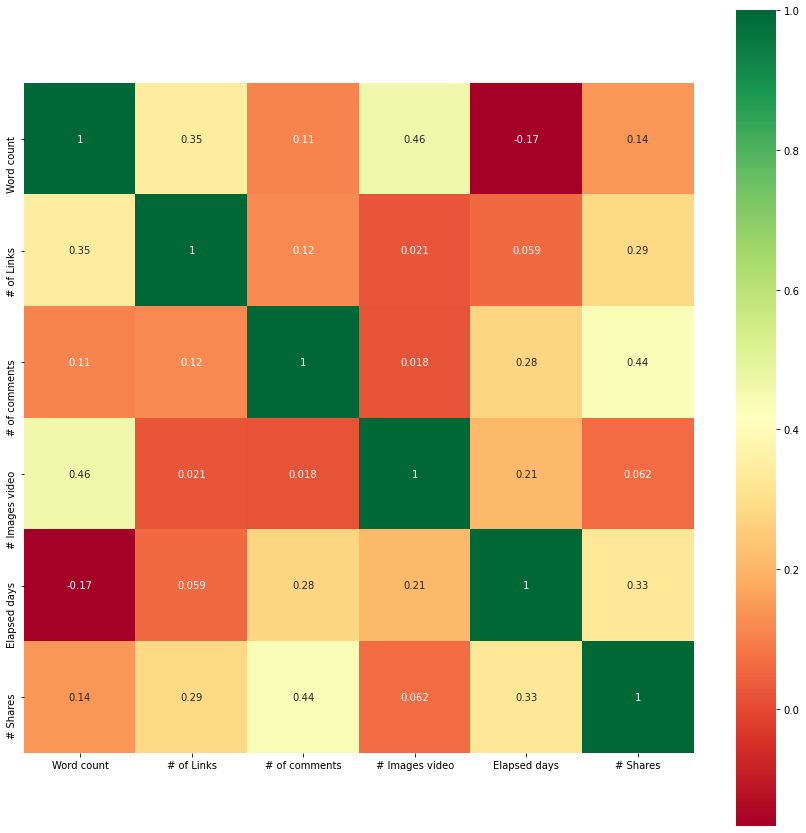

In [15]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)

In [36]:
promedio= df['# of comments'].mean()
df['# of comments'] = df['# of comments'].fillna(promedio)

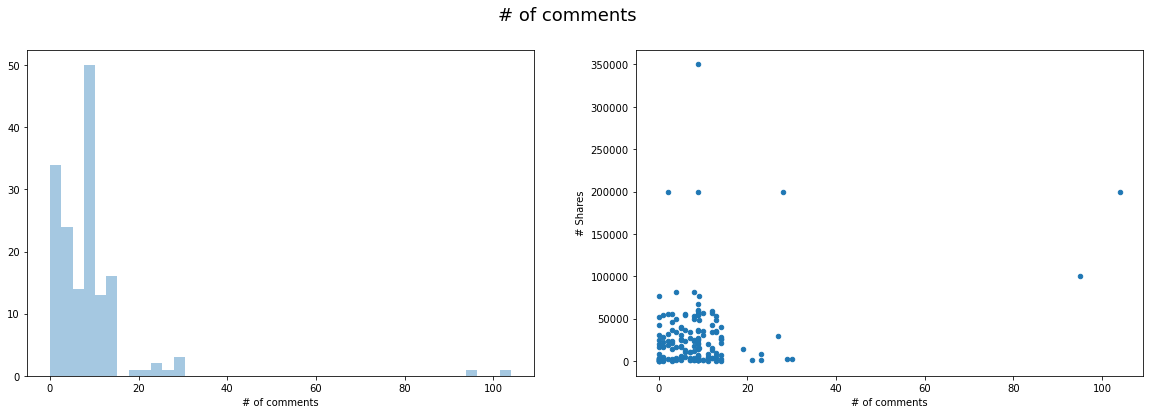

In [37]:
for col in ['# of comments']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(df[col], ax=ax[0], kde=False)
    df[[col]+['# Shares']].plot.scatter(x=col, y='# Shares', ax=ax[1])
    plt.show()

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(df['# of comments']), pd.DataFrame(df['# Shares']), test_size=0.2, random_state=29)
# Crea el modelo
modelo_x = linear_model.LinearRegression() # Entrena el modelo
modelo_x.fit(X_train, y_train)
# Valida el modelo
y_pred = modelo_x.predict(X_test)
# Evaluación del modelo
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f' 
      % r2_score(y_test, y_pred))
print('Score del modelo: %.2f' 
      % modelo_x.score(X_train, y_train))

Mean squared error (MSE): 630593607.65
Coeficiente de determinación: -0.00
Score del modelo: 0.10


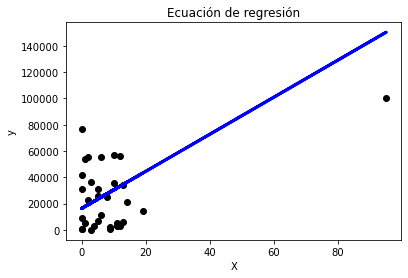

In [49]:
# Gráficas de la ecuación de regresión
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.title("Ecuación de regresión")

plt.xlabel("X")
plt.ylabel("y")

plt.show()

Populating the interactive namespace from numpy and matplotlib


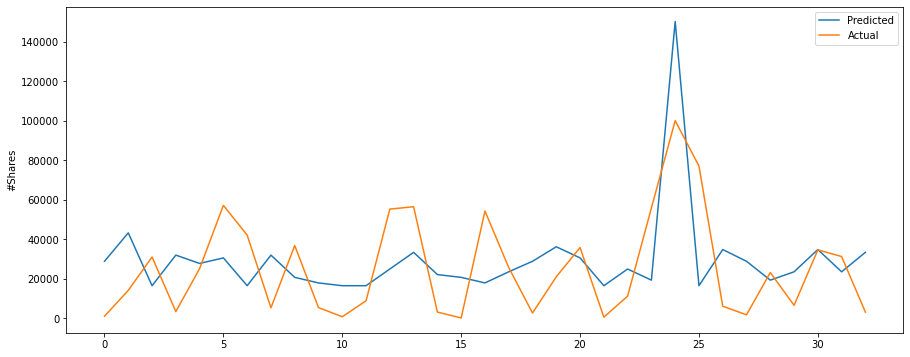

In [50]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('#Shares')

plt.legend()
plt.show()

    Eliminación de Outliers

In [54]:
df_outliers = df[(df['# of comments']<15) & (df['# Shares'] < 100000)]
df_outliers.shape

(148, 8)

/Users/arturoguerra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


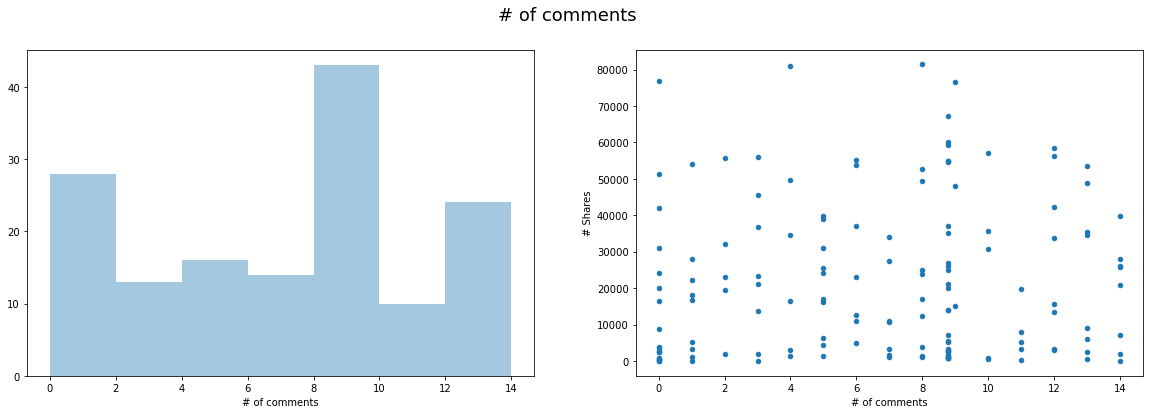

In [55]:
for col in ['# of comments']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(df_outliers[col], ax=ax[0], kde=False)
    df_outliers[[col]+['# Shares']].plot.scatter(x=col, y='# Shares', ax=ax[1])
    plt.show()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(df_outliers['# of comments']), pd.DataFrame(df_outliers['# Shares']), test_size=0.2, random_state=29)
# Crea el modelo
modelo_x = linear_model.LinearRegression() # Entrena el modelo
modelo_x.fit(X_train, y_train)
# Valida el modelo
y_pred = modelo_x.predict(X_test)
# Evaluación del modelo
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f' 
      % r2_score(y_test, y_pred))
print('Score del modelo: %.2f' 
      % modelo_x.score(X_train, y_train))

Mean squared error (MSE): 565574165.44
Coeficiente de determinación: -0.06
Score del modelo: 0.01


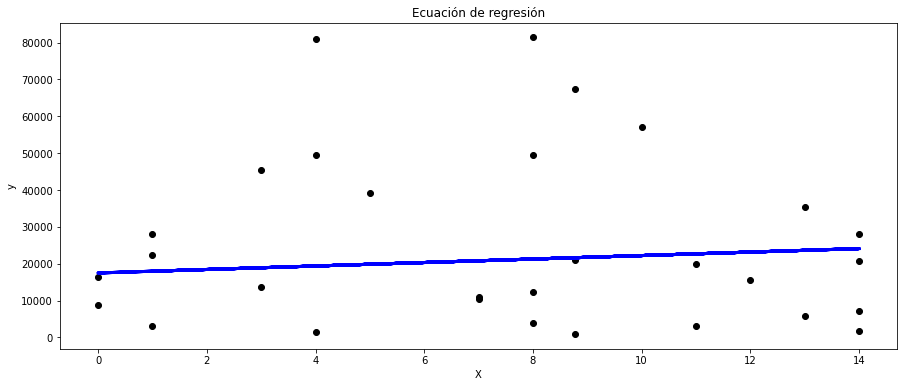

In [58]:
# Gráficas de la ecuación de regresión
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.title("Ecuación de regresión")

plt.xlabel("X")
plt.ylabel("y")

plt.show()

Populating the interactive namespace from numpy and matplotlib


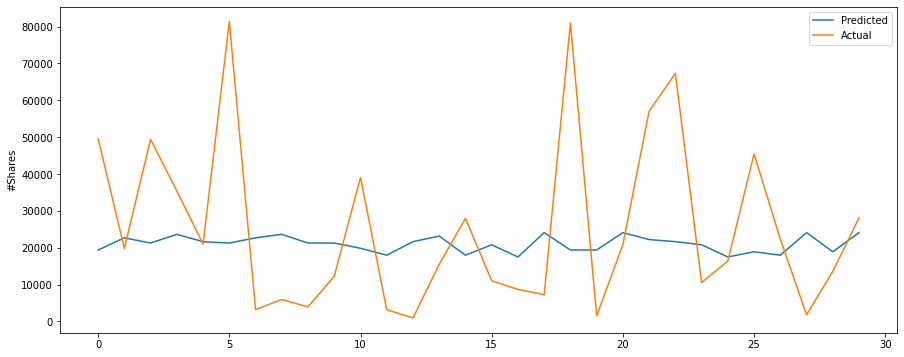

In [59]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('#Shares')

plt.legend()
plt.show()

        Regresión Multiple

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_outliers.drop(['Title','url','# Images video','Elapsed days','# Shares'],axis=1), pd.DataFrame(df_outliers['# Shares']), test_size=0.2, random_state=29)
# Crea el modelo
modelo_x = linear_model.LinearRegression() # Entrena el modelo
modelo_x.fit(X_train, y_train)
# Valida el modelo
y_pred = modelo_x.predict(X_test)
# Evaluación del modelo
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f' 
      % r2_score(y_test, y_pred))
print('Score del modelo: %.2f' 
      % modelo_x.score(X_train, y_train))

Mean squared error (MSE): 529308659.09
Coeficiente de determinación: 0.01
Score del modelo: 0.08


Populating the interactive namespace from numpy and matplotlib


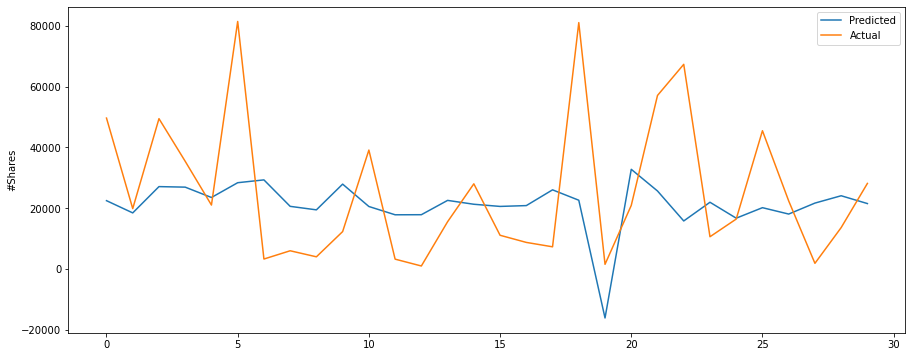

In [72]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('#Shares')

plt.legend()
plt.show()

In [73]:
df_scaled=df_outliers.drop(['Title','url','# Images video','Elapsed days','# Shares'],axis=1)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_selected = df_outliers.drop(['Title','url','# Images video','Elapsed days','# Shares'],axis=1)
scaled_data = sc.fit_transform(data_selected)
pd.DataFrame(scaled_data).head()

,0,1,2
0,-0.055449,0.414668,0.479722
1,-0.760485,-0.031125,-1.568912
2,-0.942168,-0.922712,0.479722
3,-0.949399,-0.476918,-1.568912
4,-0.619478,-0.625516,0.479722


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, pd.DataFrame(df_outliers['# Shares']), test_size=0.2, random_state=29)
# Crea el modelo
modelo_x = linear_model.LinearRegression() # Entrena el modelo
modelo_x.fit(X_train, y_train)
# Valida el modelo
y_pred = modelo_x.predict(X_test)
# Evaluación del modelo
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f' 
      % r2_score(y_test, y_pred))
print('Score del modelo: %.2f' 
      % modelo_x.score(X_train, y_train))

Mean squared error (MSE): 529308659.09
Coeficiente de determinación: 0.01
Score del modelo: 0.08
